In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp

In [2]:
os.getcwd()

'/content'

Los datos se encuentran [aqui](https://www.kaggle.com/datasets/ruslanzalevskikh/oil-well). Hacen referencia a distintas mediciones de un mismo pozo

## Limpieza de datos

In [3]:
datos = pd.read_excel("Oil well.xlsx" )

In [4]:
datos.tail(19)

,Oil well operation parameters (2013 - 2021 y). Well № 807,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
2922,2020-12-31 00:00:00,5,20,1243,15,76,16,2137,101
2923,2021-01-01 00:00:00,5,20,1450,15,72,16,2113,101
2924,2021-01-02 00:00:00,6,20,1478,15,72,16,2125,101
2925,2021-01-03 00:00:00,6,20,1478,15,72,16,2113,101
2926,2021-01-04 00:00:00,4,15,1088,11,72,12,2113,101
2927,2021-01-05 00:00:00,5,19,1408,13,71,15,2113,101
2928,2021-01-06 00:00:00,6,20,1540,15,71,16,2113,101
2929,2021-01-07 00:00:00,5,19,1437,14,71,15,2113,100
2930,2021-01-08 00:00:00,5,19,1437,14,71,15,2113,100
2931,2021-01-09 00:00:00,5,19,1446,14,71,15,2101,100


In [5]:
datos.columns=['Date','OilVolume','VolumeLiquid','GasVolume','WaterVolume','WaterCut','WorkingHours','DynamicLvl','ReservoirPress']

In [6]:
datos.drop([0,1],inplace=True)

In [7]:
datos.isnull().sum()

,0
Date,0
OilVolume,0
VolumeLiquid,0
GasVolume,0
WaterVolume,0
WaterCut,0
WorkingHours,0
DynamicLvl,0
ReservoirPress,0


No hay datos faltantes!


In [8]:
datos.describe()

<ipython-input-8-e05101d9a1ae>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  datos.describe()


,Date,OilVolume,VolumeLiquid,GasVolume,WaterVolume,WaterCut,WorkingHours,DynamicLvl,ReservoirPress
count,2939,2939,2939,2939,2939,2939,2939,2939,2939
unique,2939,50,88,1148,72,58,18,275,115
top,2013-01-01 00:00:00,14,57,3684,43,75,24,2122,157
freq,1,287,205,33,169,325,2002,231,26


In [9]:
datos.index = datos['Date']

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


In [10]:
datos

,Date,OilVolume,VolumeLiquid,GasVolume,WaterVolume,WaterCut,WorkingHours,DynamicLvl,ReservoirPress
Date,,,,,,,,,
2013-01-01,2013-01-01 00:00:00,49,70,13055,21,29,24,1819,214
2013-01-02,2013-01-02 00:00:00,49,70,13055,21,29,24,1836,214
2013-01-03,2013-01-03 00:00:00,49,70,13055,21,29,24,1788,214
2013-01-04,2013-01-04 00:00:00,49,70,13055,21,29,24,1789,214
2013-01-05,2013-01-05 00:00:00,44,70,11768,26,36,24,1825,214
...,...,...,...,...,...,...,...,...,...
2021-01-14,2021-01-14 00:00:00,6,20,1593,15,70,16,2101,100
2021-01-15,2021-01-15 00:00:00,6,20,1593,15,70,16,2113,100
2021-01-16,2021-01-16 00:00:00,6,20,1583,14,70,16,2125,100


In [11]:
datos.drop('Date',inplace=True, axis=1); datos

,OilVolume,VolumeLiquid,GasVolume,WaterVolume,WaterCut,WorkingHours,DynamicLvl,ReservoirPress
Date,,,,,,,,
2013-01-01,49,70,13055,21,29,24,1819,214
2013-01-02,49,70,13055,21,29,24,1836,214
2013-01-03,49,70,13055,21,29,24,1788,214
2013-01-04,49,70,13055,21,29,24,1789,214
2013-01-05,44,70,11768,26,36,24,1825,214
...,...,...,...,...,...,...,...,...
2021-01-14,6,20,1593,15,70,16,2101,100
2021-01-15,6,20,1593,15,70,16,2113,100
2021-01-16,6,20,1583,14,70,16,2125,100


In [12]:
# Convertir todas las columnas de tipo object a numéricas
datos[datos.select_dtypes(include=['object']).columns] = datos.select_dtypes(include=['object']).apply(pd.to_numeric, errors='coerce')


In [ ]:
datos.describe()

,OilVolume,VolumeLiquid,GasVolume,WaterVolume,WaterCut,WorkingHours,DynamicLvl,ReservoirPress
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,17.624362,59.464103,4730.146308,41.828853,70.694794,22.344675,1930.383464,157.019054
std,9.689026,18.634101,2598.888524,13.056625,9.534203,3.039553,114.543752,32.917150
min,0.000000,12.000000,4.000000,9.000000,29.000000,7.000000,1529.000000,100.000000
25%,11.000000,50.000000,3041.500000,33.000000,69.000000,22.000000,1855.000000,129.000000
50%,15.000000,58.000000,3909.000000,43.000000,73.000000,24.000000,1890.000000,157.000000
75%,22.000000,74.000000,5843.500000,50.000000,76.000000,24.000000,2008.000000,185.500000
max,49.000000,113.000000,13113.000000,99.000000,100.000000,24.000000,2137.000000,214.000000


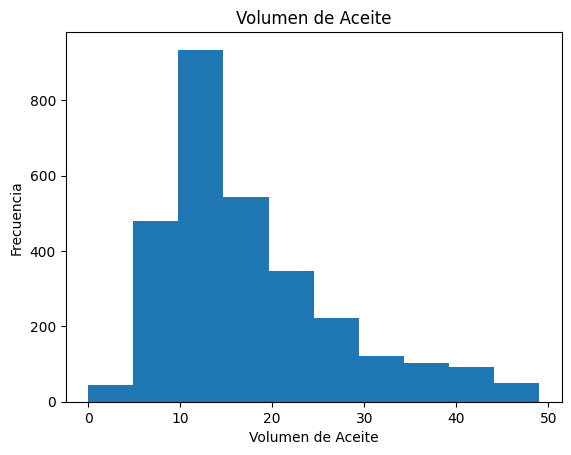

In [18]:
plt.hist(datos['OilVolume'])
plt.title('Volumen de Aceite')
plt.xlabel('Volumen de Aceite')
plt.ylabel('Frecuencia')
plt.show()

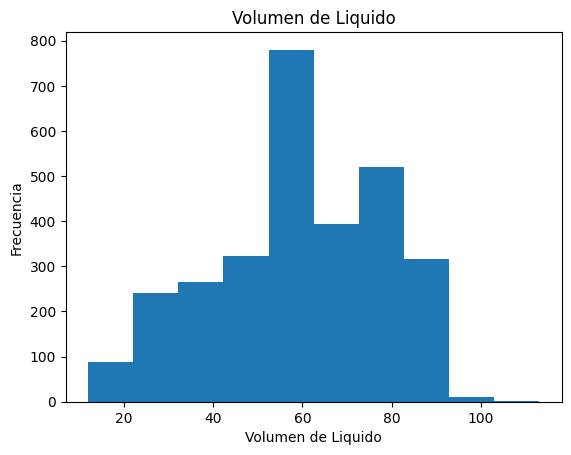

In [19]:
plt.hist(datos['VolumeLiquid'])
plt.title('Volumen de Liquido')
plt.xlabel('Volumen de Liquido')
plt.ylabel('Frecuencia')
plt.show()

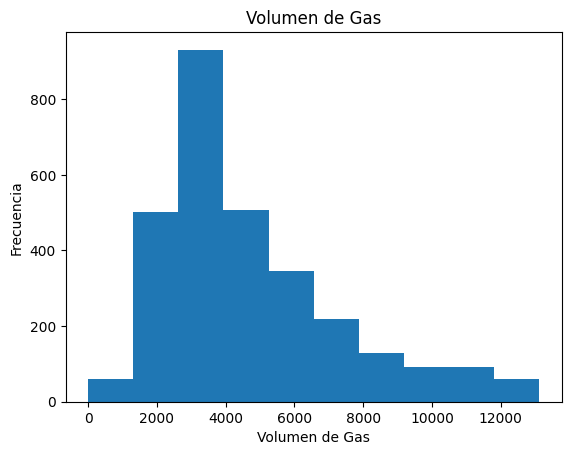

In [20]:
plt.hist(datos['GasVolume'])
plt.title('Volumen de Gas')
plt.xlabel('Volumen de Gas')
plt.ylabel('Frecuencia')
plt.show()

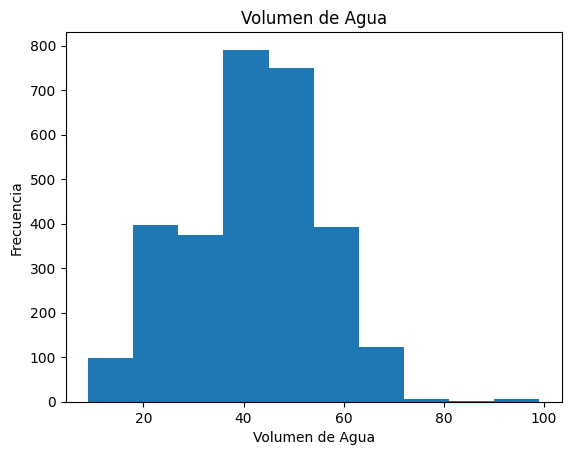

In [21]:
plt.hist(datos['WaterVolume'])
plt.title('Volumen de Agua')
plt.xlabel('Volumen de Agua')
plt.ylabel('Frecuencia')
plt.show()

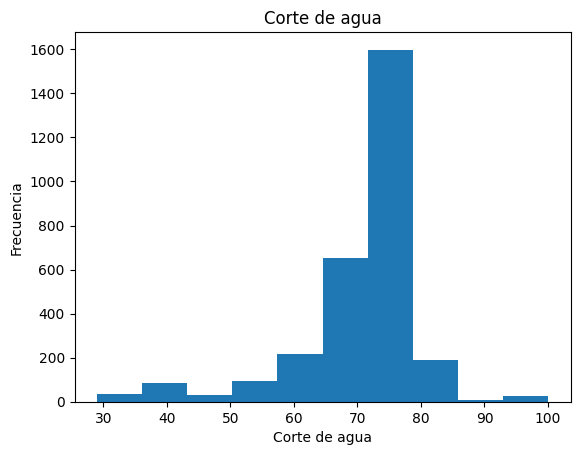

In [22]:
plt.hist(datos['WaterCut'])
plt.title('Corte de agua')
plt.xlabel('Corte de agua')
plt.ylabel('Frecuencia')
plt.show()

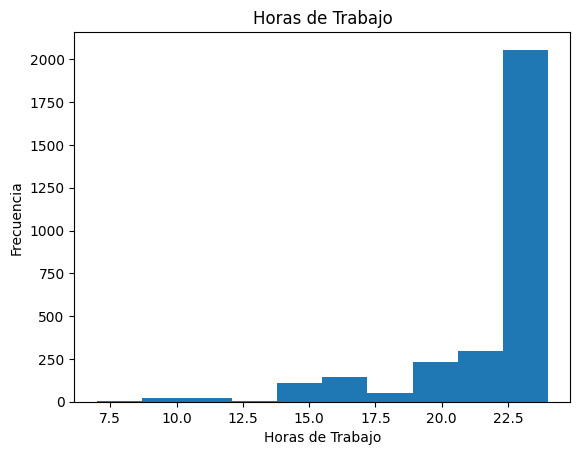

In [23]:
plt.hist(datos['WorkingHours'])
plt.title('Horas de Trabajo')
plt.xlabel('Horas de Trabajo')
plt.ylabel('Frecuencia')
plt.show()

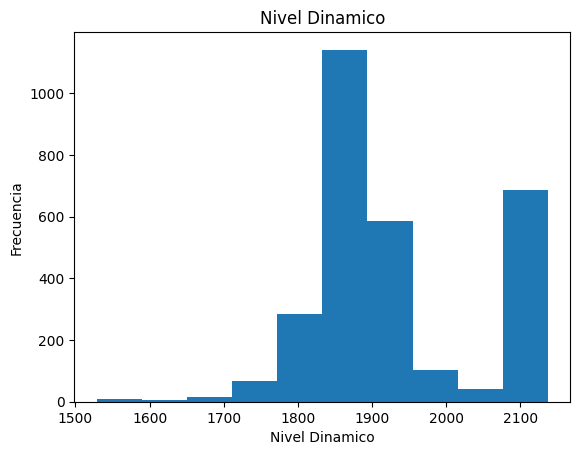

In [24]:
plt.hist(datos['DynamicLvl'])
plt.title('Nivel Dinamico')
plt.xlabel('Nivel Dinamico')
plt.ylabel('Frecuencia')
plt.show()

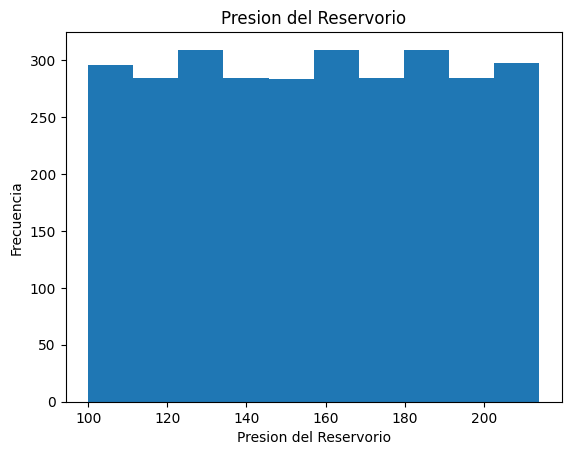

In [25]:
plt.hist(datos['ReservoirPress'])
plt.title('Presion del Reservorio')
plt.xlabel('Presion del Reservorio')
plt.ylabel('Frecuencia')
plt.show()